In [18]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import pandas as pd


In [19]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Update the ‘magnesium’ column by multiplying each value by 100
df['magnesium'] = df['magnesium'] * 100

In [20]:
# 2.Perform exploratory analysis on this dataset to make a decision on which type of Naive Bayes Classifier
# is suited for this dataset.
print(df.describe())
print(df['target'].value_counts())

          alcohol  malic_acid         ash  alcalinity_of_ash     magnesium  \
count  178.000000  178.000000  178.000000         178.000000    178.000000   
mean    13.000618    2.336348    2.366517          19.494944   9974.157303   
std      0.811827    1.117146    0.274344           3.339564   1428.248352   
min     11.030000    0.740000    1.360000          10.600000   7000.000000   
25%     12.362500    1.602500    2.210000          17.200000   8800.000000   
50%     13.050000    1.865000    2.360000          19.500000   9800.000000   
75%     13.677500    3.082500    2.557500          21.500000  10700.000000   
max     14.830000    5.800000    3.230000          30.000000  16200.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359 

In [21]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [22]:
input_colums = list(df.columns)
print(input_colums)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


In [23]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,12700.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,10000.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,10100.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,11300.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,11800.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,9500.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,10200.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,12000.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,12000.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


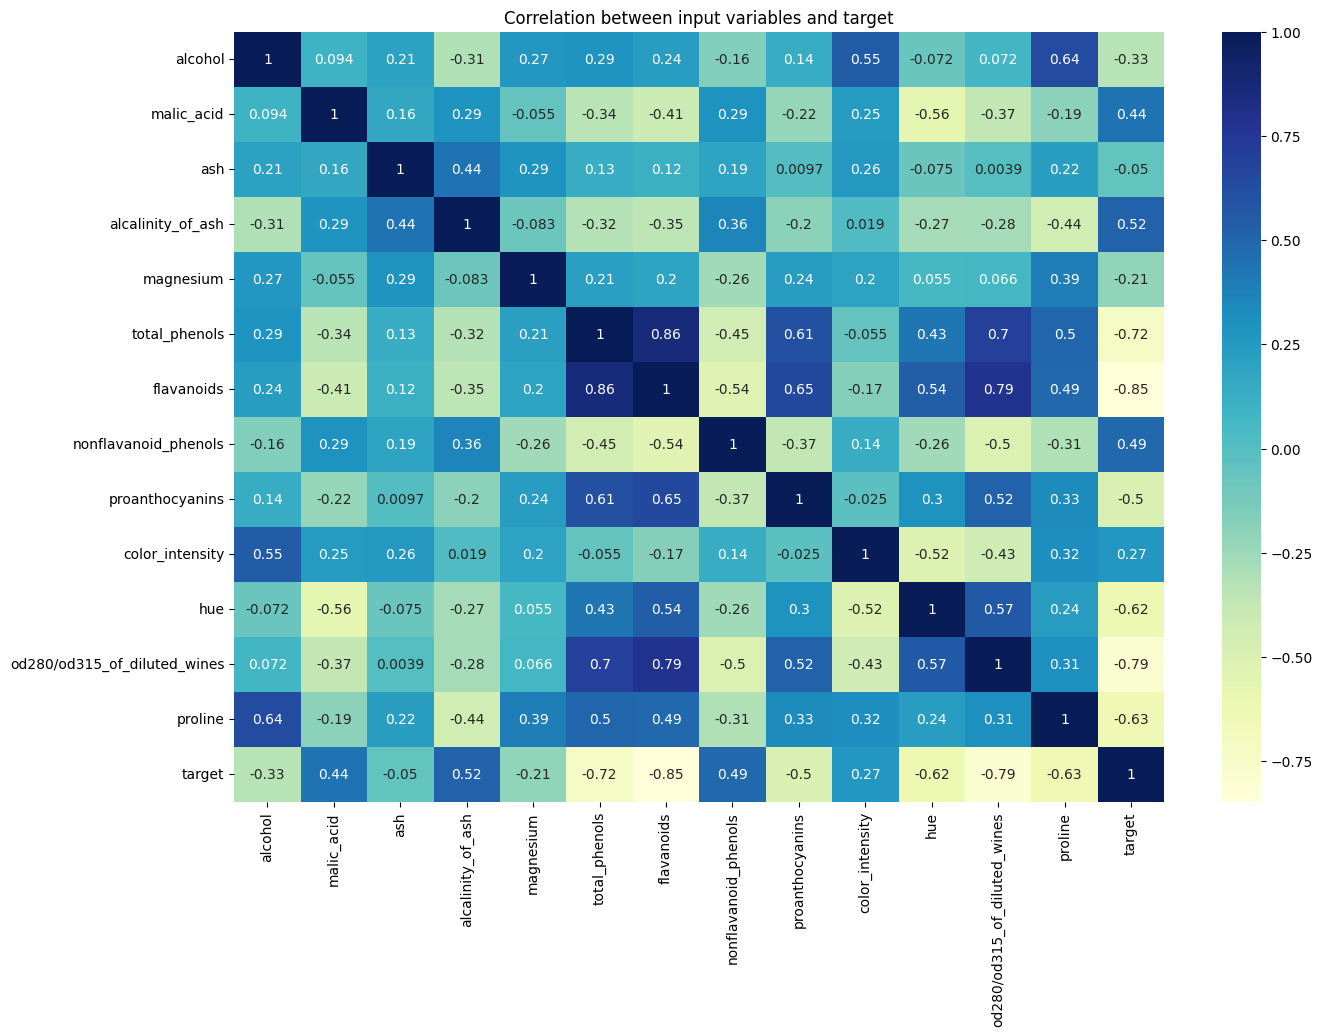

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('Correlation between input variables and target', loc= 'center')
sns.heatmap(df[input_colums].corr(),annot = True, cmap= 'YlGnBu')
plt.show()

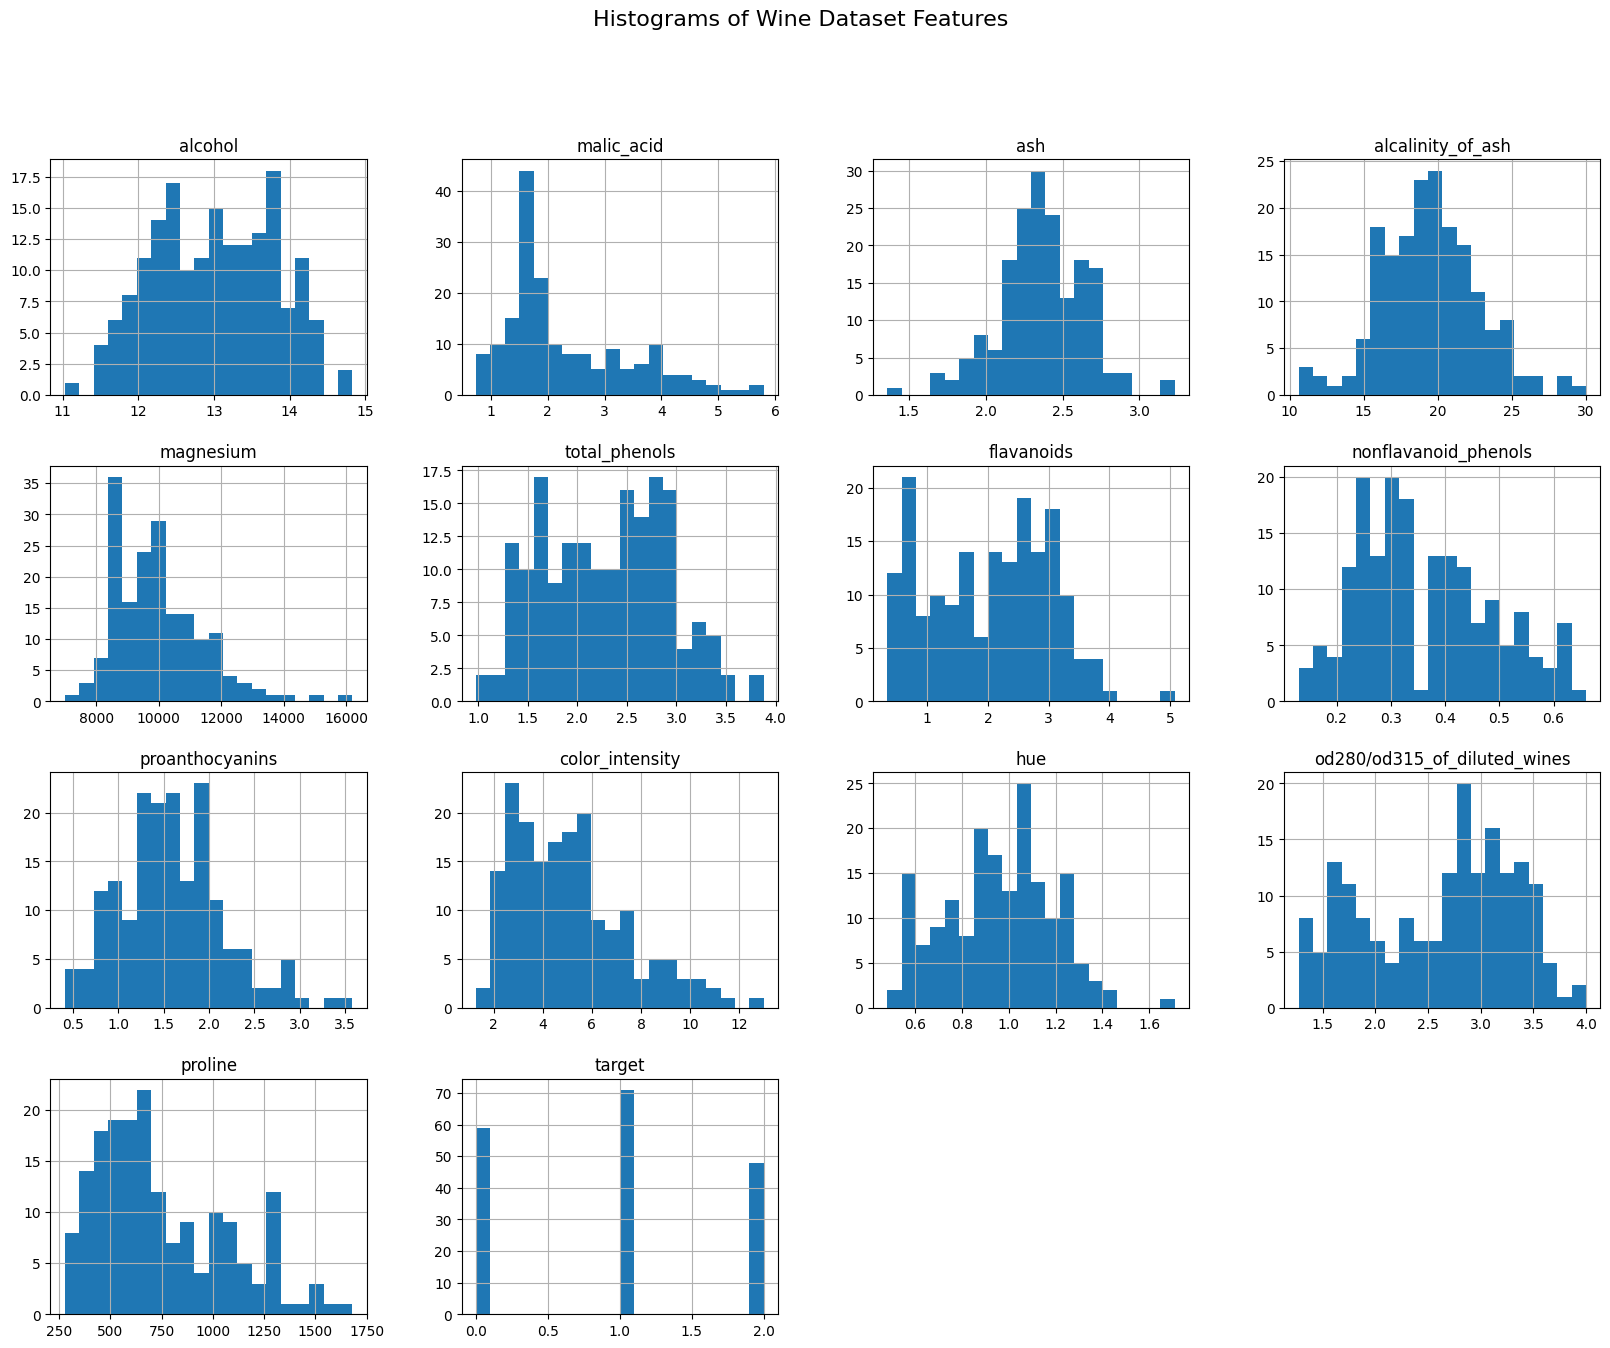

In [25]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Wine Dataset Features', fontsize=16)
plt.show()

### Which Naive Bayes Classifier did you choose and why?

Upon examining the histograms, we observe that many features exhibit an approximately Gaussian distribution. Given this observation, we choose to use the **Gaussian Naive Bayes (GaussianNB)** classifier for this dataset. The GaussianNB classifier is well-suited for continuous data that follows a normal distribution, which aligns with the distribution of the features in the Wine dataset.


In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Using GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate on the test set
y_pred = gnb.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")

Accuracy without scaling: 0.9815


### Repeat the training and evaluation process using StandardScaler for feature scaling


In [60]:
from sklearn.preprocessing import StandardScaler

# StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the GaussianNB classifier with scaled data
gnb.fit(X_train_scaled, y_train)
y_pred_scaled = gnb.predict(X_test_scaled)
accuracy_standard_scaler = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with StandardScaler: {accuracy_standard_scaler:.4f}")

Accuracy with StandardScaler: 0.9815


### Repeat the training and evaluation process using MinMaxScaler for feature scaling.

In [62]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler for feature scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

# Train the GaussianNB classifier with MinMax scaled data
gnb.fit(X_train_min_max, y_train)
y_pred_min_max = gnb.predict(X_test_min_max)
accuracy_min_max_scaler = accuracy_score(y_test, y_pred_min_max)
print(f"Accuracy with MinMaxScaler: {accuracy_min_max_scaler:.4f}")

Accuracy with MinMaxScaler: 0.9815


###  Display the accuracy scores for the classifier without scaling, with StandardScaler, and with MinMaxScaler

In [29]:
print(f"Accuracy without scaling: {accuracy_no_scaling:.6f}")
print(f"Accuracy with StandardScaler: {accuracy_standard_scaler:.6f}")
print(f"Accuracy with MinMaxScaler: {accuracy_min_max_scaler:.6f}")


Accuracy without scaling: 0.981481
Accuracy with StandardScaler: 0.981481
Accuracy with MinMaxScaler: 0.981481


### How do the accuracy scores compare with each other? It is generally said that the Naive Bayes Classifier is independent of feature scaling, why is it said so? As per our test, can we say that the Naive Bayes classifier is independent of feature scaling? Explain your answer in detail'

The GaussianNB is said to be independent of feature scaling since they rely on the distribution of individual features, and scaling does not change the Gaussian nature of the distributions.

As our testcase, we can say that the GaussianNB is independent as the accuracy for **without scaling**, **scaling with StandardScaler** and **MinMaxScaler** are equal ( = 0.981481)

## for the original dataset multiply the entire ‘magnesium’ column by 10,000,000 and then perform steps 2 to 8 again.

In [94]:
wine = load_wine()
df_updated = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Update the 'magnesium' column by multiplying each value by 10,000,000
df_updated['magnesium'] = df_updated['magnesium'] * 10000000

df_updated['target'] = wine.target

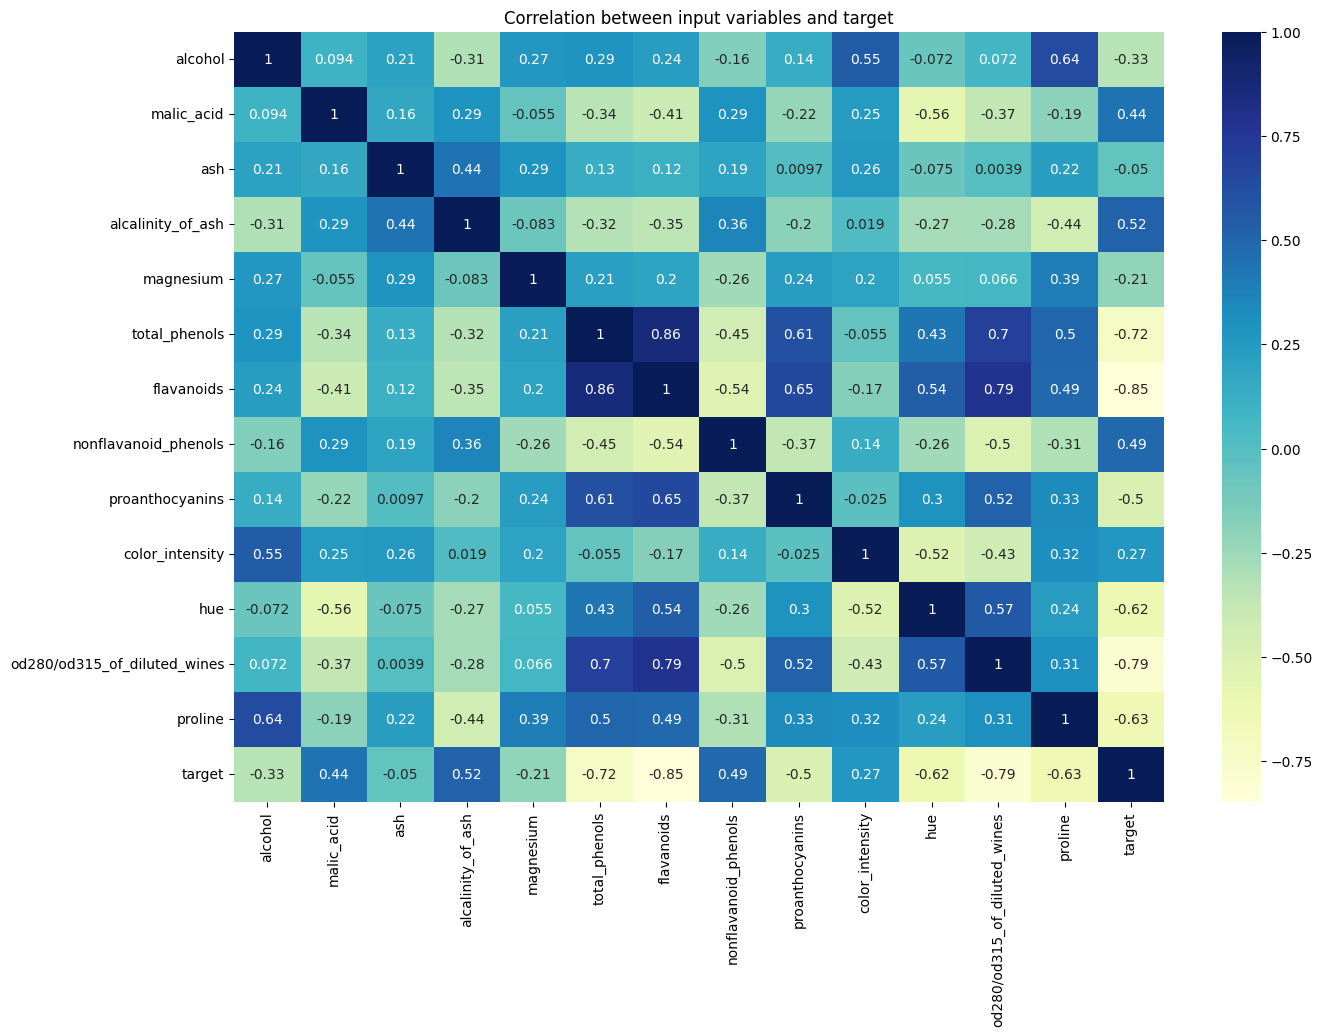

In [95]:
plt.figure(figsize=(15,10))
plt.title('Correlation between input variables and target', loc= 'center')
sns.heatmap(df[input_colums].corr(),annot = True, cmap= 'YlGnBu')
plt.show()

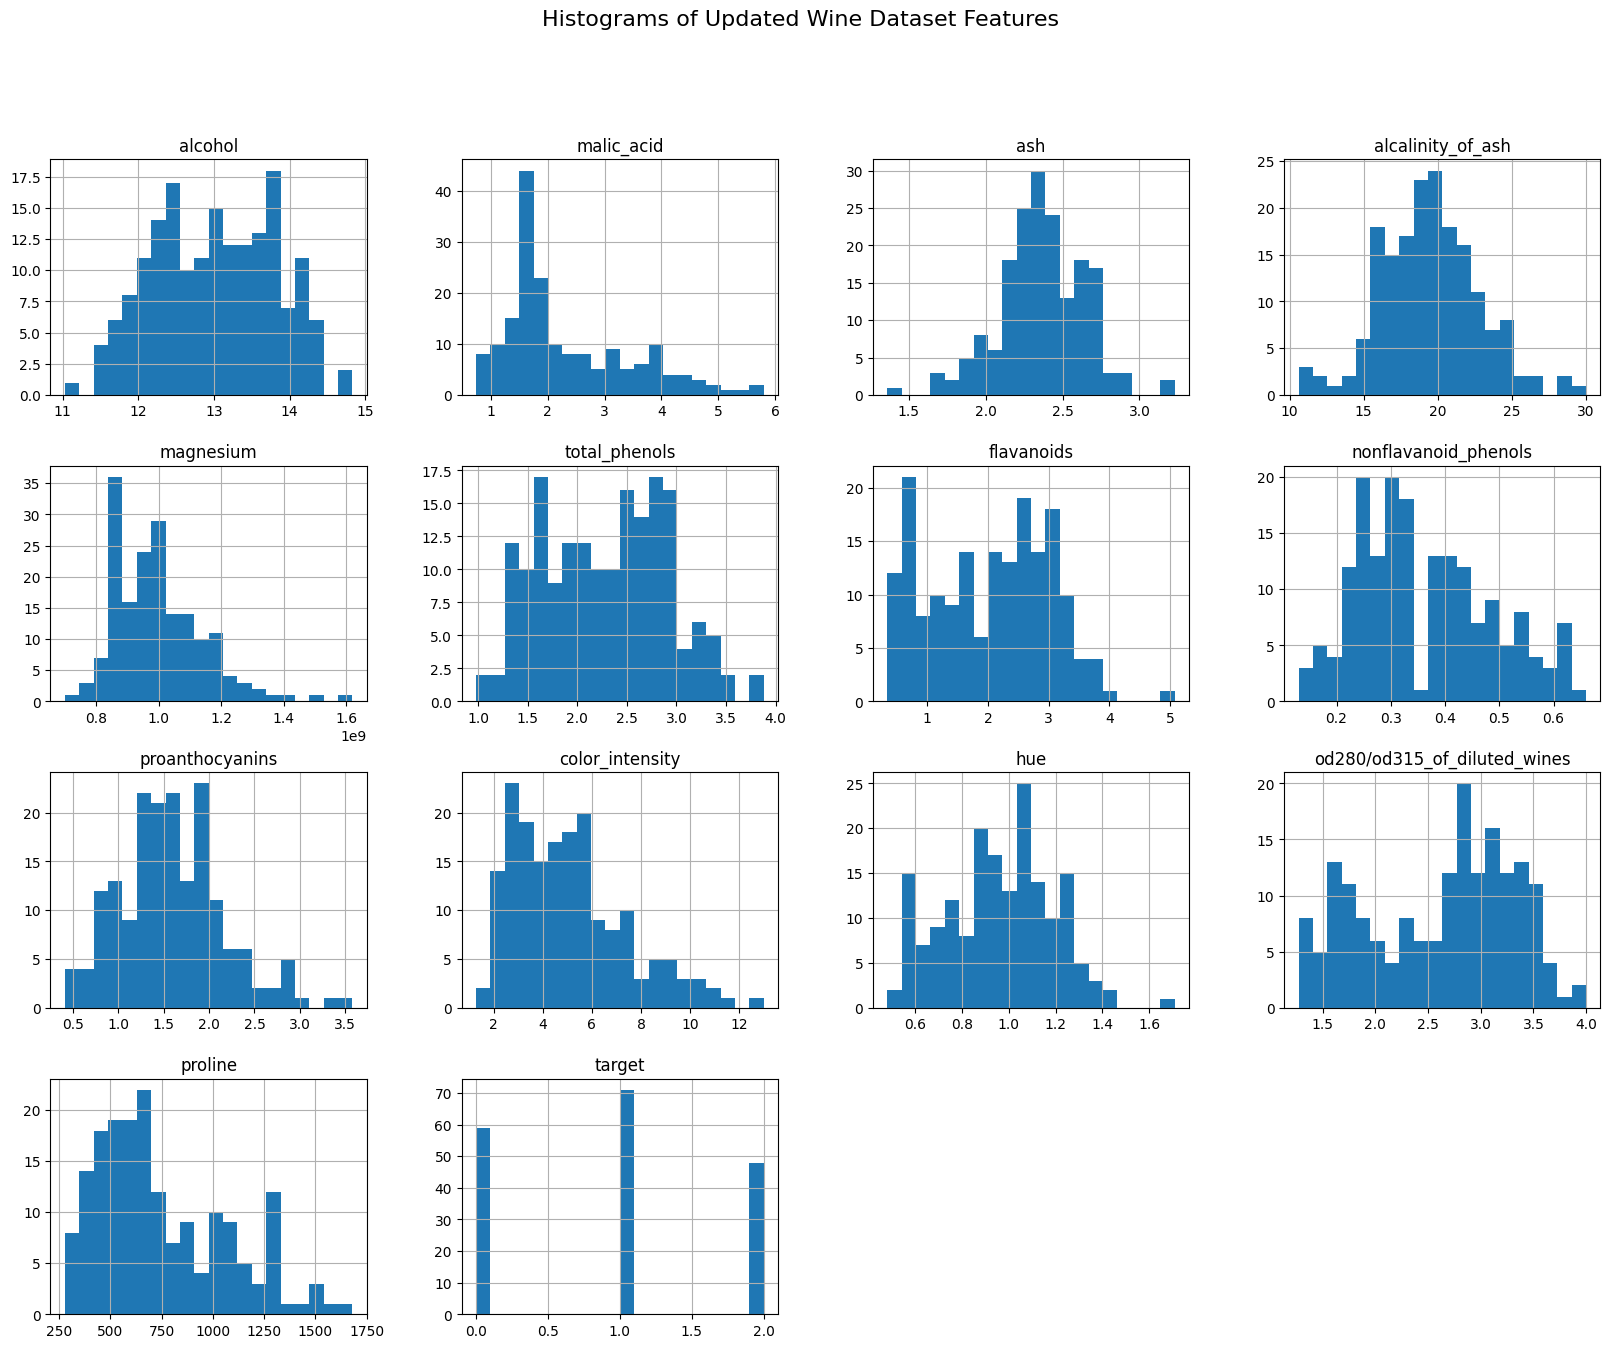

In [96]:
df_updated.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Updated Wine Dataset Features', fontsize=16)
plt.show()

In [100]:
X = df_updated.drop('target', axis=1)
y = df_updated['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred)

In [101]:
# Train and evaluate with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy_std_scale = accuracy_score(y_test, y_pred)

In [102]:
# Train and evaluate with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = GaussianNB()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy_min_max_scale = accuracy_score(y_test, y_pred)

In [103]:
# Display accuracy scores
print("Accuracy without scaling:", accuracy_no_scale)
print("Accuracy with StandardScaler:", accuracy_std_scale)
print("Accuracy with MinMaxScaler:", accuracy_min_max_scale)

Accuracy without scaling: 0.46296296296296297
Accuracy with StandardScaler: 0.9814814814814815
Accuracy with MinMaxScaler: 0.9814814814814815


It is assumed that Naive Bayes classifiers are independent of feature scaling because their computations rely on mean and variance, which are not affected by scaling. However, in our testcase, feature scaling can significantly improve the classifier's performance by ensuring numerical stability and better adherence to the model's assumptions. This is evident from our test results, where scaling the features resulted in significantly higher accuracy compared to no scaling. This can be explained by numerical instability, making it harder for the model to compute probabilities accurately. In our case, those in the 'magnesium' column after scaling by 10,000,000 can introduce very large values.